# Notebook Info

This notebook demos inference of the current production model on holdout data. Due to the low amount of data available, currently we are only using a test/train split, no validation. 

First, some boilerplate to load the model and data:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils.data as du
import utils.plots as pu
import utils.training as tu
import utils.models as models

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torch.utils.data as tdu
import mlflow
from tqdm import tqdm

/home/phoebus/MPRINCE/anaconda3/envs/soc_xrd/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
scan_dataset = du.PosDataDatset('../../Data/robo_steer/raw/', 200)
train_size = int(0.8 * len(scan_dataset))
test_size = len(scan_dataset) - train_size
train_dataset, test_dataset = tdu.random_split(scan_dataset, [train_size, test_size], torch.Generator().manual_seed(42))

Discarded 4 invalid scans!


In [4]:
model = models.MLP(200, 256, 1, 2)
model.load_state_dict(torch.load('models_prod/mlp_256_2.ckpt'))

<All keys matched successfully>

# Performance Histogram

This histogram and the printout below display the absolute (l1) error for each sample in the test set. The output ranges from -1 to 1 so to get a ballpark percentage offset, divide the number by 2.  

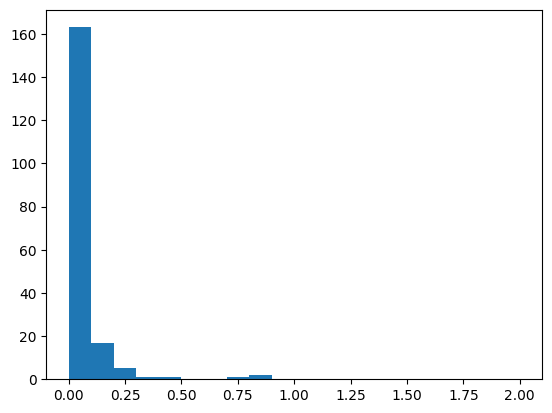

In [5]:
fig, hist_info = pu.plot_diff_hist(model, scan_dataset, test_dataset)

In [7]:
pu.print_hist_info(hist_info)

Total Range: 0.00-2.00
Err Range: [range_low]-[range_high]: [num_samples] [% of total samples]
Err Range 0.00-0.10: 163 85.79%
Err Range 0.10-0.20: 17 8.95%
Err Range 0.20-0.30: 5 2.63%
Err Range 0.30-0.40: 1 0.53%
Err Range 0.40-0.50: 1 0.53%
Err Range 0.70-0.80: 1 0.53%
Err Range 0.80-0.90: 2 1.05%


# Individual Samples

The following graphs are samples selected from the test set. The line in blue represents the reading. The orange ball is the ground truth user selection. The green x is the model's prediction. 

NOTE: The Y axis may be off for the ball and X. This is due to interpolation noise for the graphs. The model ONLY outputs an X value so this has no bearing on the performance of the model.  

## First, graph random samples

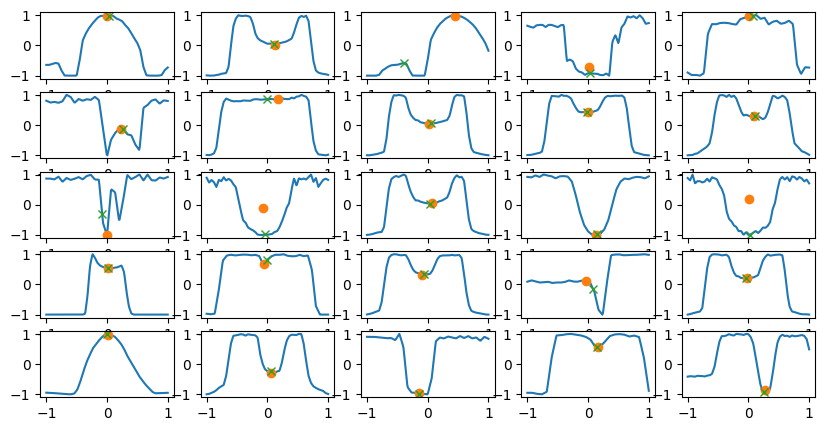

In [8]:
fig = pu.graph_sample(model, scan_dataset, test_dataset)

## Next, graph highest error samples

(Left to right, top to bottom)

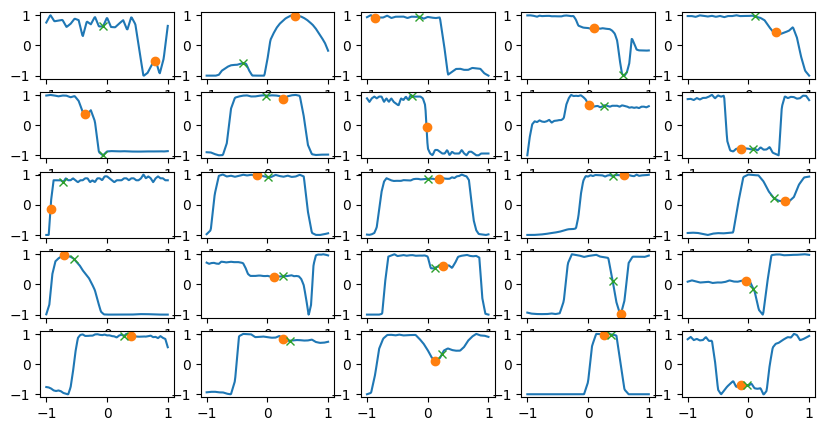

In [9]:
fig = pu.graph_ers(model, scan_dataset, test_dataset)

## Finally, Lowest error samples

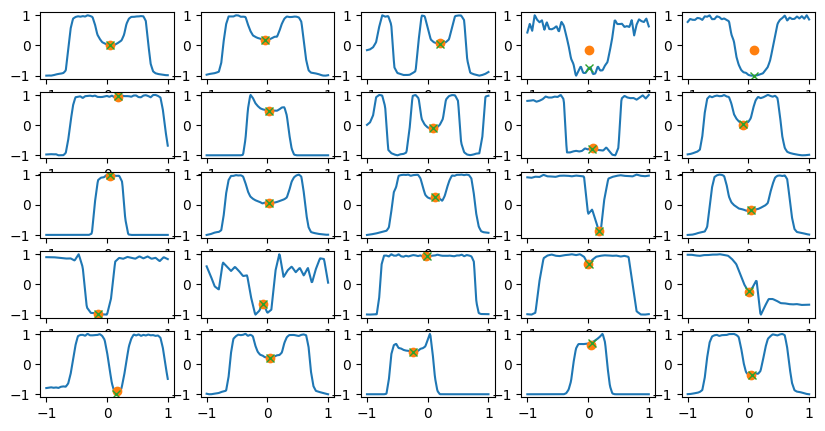

In [10]:
fig = pu.graph_ers(model, scan_dataset, test_dataset, False)